In this Notebook I demonstrate the 30 Years of European Wind Generation dataset and show what pre-processing steps we applied to make it fit for input.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

In [48]:
df = pd.read_csv('raw_wind_data/country_by_country_raw.csv')

In [49]:
# Keep only German data at this point
df = df['DE']
# Check length
len(df)

262968

Since the dataset tracks around 30 years with hourly data, it is rather large.

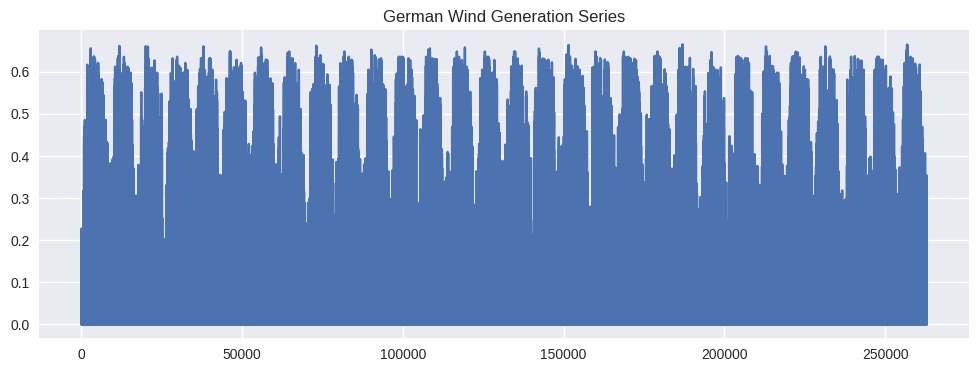

In [50]:
plt.figure(figsize=(12,4))
df.plot()
plt.title('German Wind Generation Series')
plt.show()

Noteworthy that the data does not include a date index, which begins at `'1986-01-01 00:00:00'`. We can therefore generate the timestamp manually in a format that is compatible with Informer and Autoformer.

In [56]:
start_date = '1986-01-01 00:00:00'
datetime_index = pd.date_range(start=start_date, periods=len(df), freq='H')

if len(datetime_index) == len(df):
    df = pd.DataFrame({'date': datetime_index, 'TARGET': df})
else:
    print('Something went wrong.')

In [57]:
df

,date,TARGET
0,1986-01-01 00:00:00,0.0
1,1986-01-01 01:00:00,0.0
2,1986-01-01 02:00:00,0.0
3,1986-01-01 03:00:00,0.0
4,1986-01-01 04:00:00,0.0
...,...,...
262963,2015-12-31 19:00:00,0.0
262964,2015-12-31 20:00:00,0.0
262965,2015-12-31 21:00:00,0.0
262966,2015-12-31 22:00:00,0.0


We can visualize the last day, last 4 days (96 hours - standard encoder input length for Informer and Autoformer) and last month.

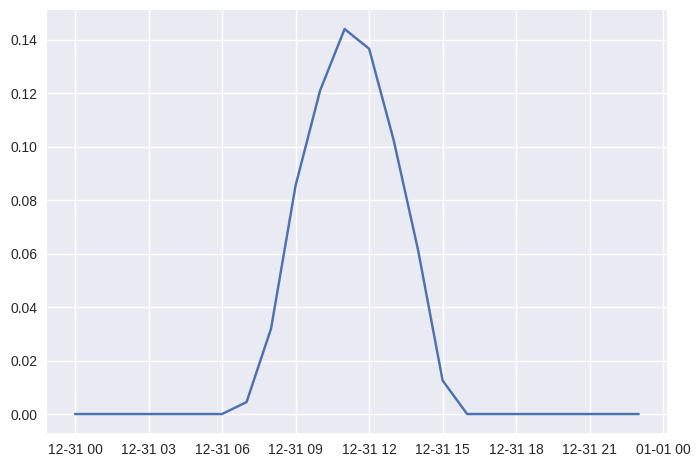

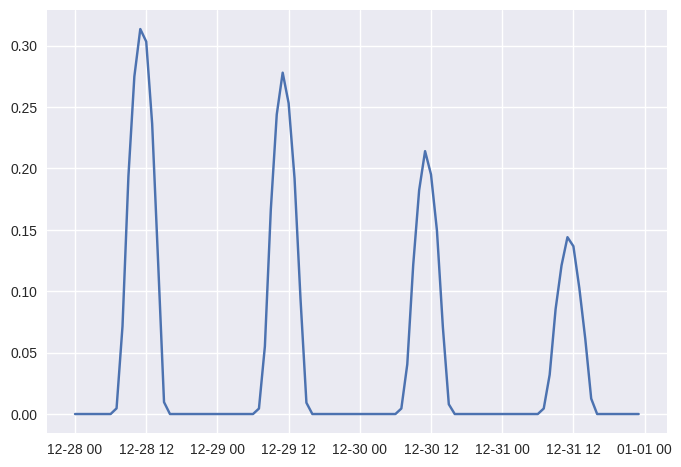

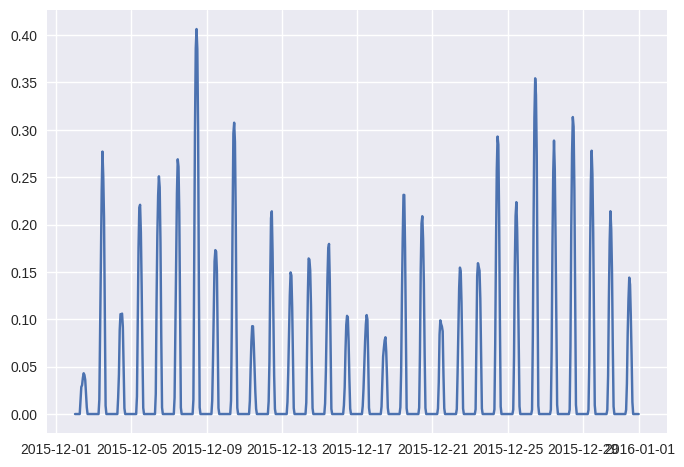

In [67]:
hour_list = [24, 96, 720]

for item in hour_list:
    plt.plot(df['date'][-item:], df['TARGET'][-item:])
    plt.show()

In [70]:
zeros = np.sum(df['TARGET'] == 0)
print(f'There are {zeros} zero values in the dataset.')

There are 131484 zero values in the dataset.


Since we have not inspected all the models to implement yet, at the initial stage it would be safer to transform the zeros (which are all valid observations) to a number very close to zero to avoid any complications in the future. Once we are sure about all the models, we can just keep zeros.

In [72]:
df['TARGET'] = df['TARGET'].replace(0, 1e-10)

In [74]:
df.value_counts()

date                 TARGET      
1986-01-01 00:00:00  1.000000e-10    1
2006-01-04 05:00:00  1.000000e-10    1
2005-12-31 07:00:00  1.000000e-10    1
2005-12-31 08:00:00  1.263516e-02    1
2005-12-31 09:00:00  3.553127e-02    1
                                    ..
1996-01-01 13:00:00  7.162890e-02    1
1996-01-01 14:00:00  5.472367e-02    1
1996-01-01 15:00:00  2.186500e-02    1
1996-01-01 16:00:00  1.000000e-10    1
2015-12-31 23:00:00  1.000000e-10    1
Length: 262968, dtype: int64

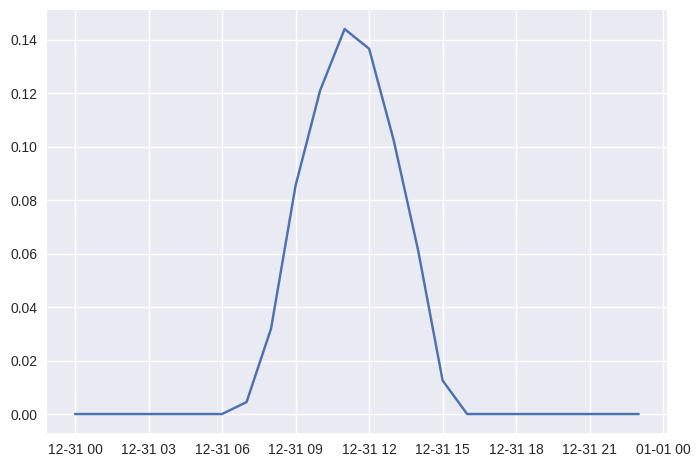

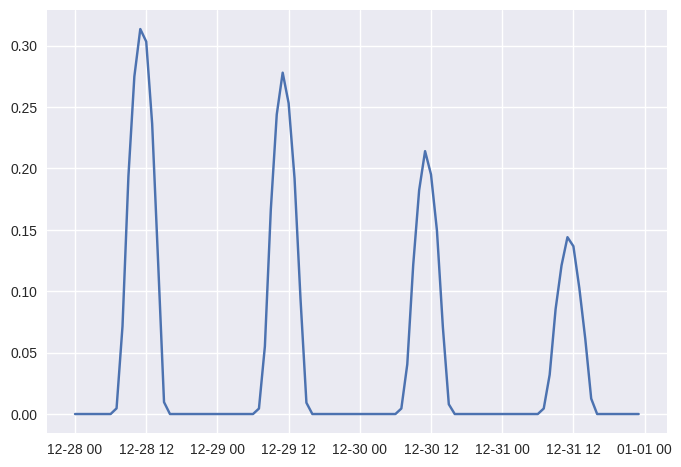

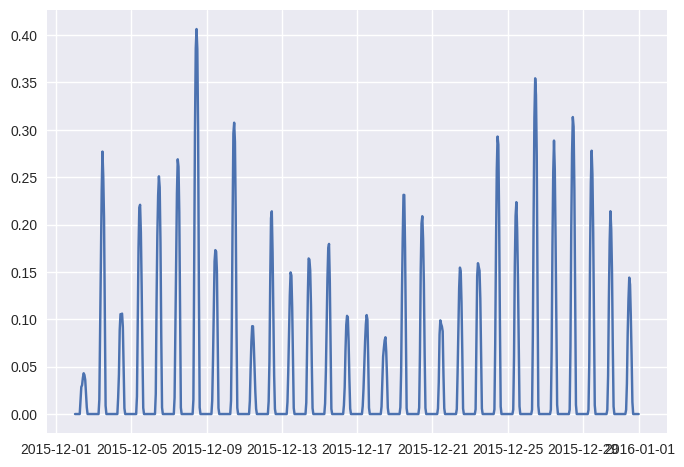

In [75]:
hour_list = [24, 96, 720]

for item in hour_list:
    plt.plot(df['date'][-item:], df['TARGET'][-item:])
    plt.show()

In [80]:
# Generate a smaller set
df_small = df[-17420:]

In [81]:
df_small.reset_index(drop=True)

,date,TARGET
0,2014-01-05 04:00:00,1.000000e-10
1,2014-01-05 05:00:00,1.000000e-10
2,2014-01-05 06:00:00,1.000000e-10
3,2014-01-05 07:00:00,1.000000e-10
4,2014-01-05 08:00:00,3.851301e-02
...,...,...
17415,2015-12-31 19:00:00,1.000000e-10
17416,2015-12-31 20:00:00,1.000000e-10
17417,2015-12-31 21:00:00,1.000000e-10
17418,2015-12-31 22:00:00,1.000000e-10


In [82]:
df.to_csv('DEWINDh_large.csv', index=False)
df_small.to_csv('DEWINDh_small.csv', index=False)